## 1–2) Load Dataset 


In [ ]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LISTINGS_PATH = './listings.csv'
# Load
df = pd.read_csv(LISTINGS_PATH, low_memory=False)
print('Shape:', df.shape)
df.head(3)


Shape: (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


## 3) Data Exploration — Size, Types, Missingness

In [2]:

def explore_dataframe(df: pd.DataFrame):
    n_rows, n_cols = df.shape
    print(f"Records: {n_rows}, Features: {n_cols}")
    print("\nData types:")
    print(df.dtypes.sort_index())

    print("\nMissing values per column (top 30 by count):")
    miss = df.isna().sum().sort_values(ascending=False)
    display(miss.head(30))

    print("\nBasic describe (numeric):")
    display(df.describe(include=[np.number]).T)

    print("\nBasic describe (categorical):")
    display(df.describe(include=['object', 'category']).T)

explore_dataframe(df)


Records: 3818, Features: 92

Data types:
accommodates         int64
amenities           object
availability_30      int64
availability_365     int64
availability_60      int64
                     ...  
thumbnail_url       object
transit             object
weekly_price        object
xl_picture_url      object
zipcode             object
Length: 92, dtype: object

Missing values per column (top 30 by count):


license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_checkin           658
review_scores_accuracy          658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
reviews_per_month               627
first_review                    627
space                           569
host_response_time              523
host_response_rate              523
neighbourhood                   416
xl_picture_url                  320
medium_url                      320
thumbnail_url               


Basic describe (numeric):


,count,mean,std,min,25%,50%,75%,max
id,3818.0,5.550111e+06,2.962660e+06,3.335000e+03,3.258256e+06,6.118244e+06,8.035127e+06,1.034016e+07
scrape_id,3818.0,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
host_id,3818.0,1.578556e+07,1.458382e+07,4.193000e+03,3.275204e+06,1.055814e+07,2.590309e+07,5.320861e+07
host_listings_count,3816.0,7.157757e+00,2.862815e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
host_total_listings_count,3816.0,7.157757e+00,2.862815e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
latitude,3818.0,4.762896e+01,4.305195e-02,4.750509e+01,4.760942e+01,4.762360e+01,4.766269e+01,4.773336e+01
longitude,3818.0,-1.223331e+02,3.174451e-02,-1.224172e+02,-1.223543e+02,-1.223289e+02,-1.223108e+02,-1.222406e+02
accommodates,3818.0,3.349398e+00,1.977599e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3802.0,1.259469e+00,5.903691e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
bedrooms,3812.0,1.307712e+00,8.833949e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00



Basic describe (categorical):


,count,unique,top,freq
listing_url,3818,3818,https://www.airbnb.com/rooms/241032,1
last_scraped,3818,1,2016-01-04,3818
name,3818,3792,Capitol Hill Apartment,3
summary,3641,3478,This is a modern fully-furnished studio apartm...,15
space,3249,3119,"*Note: This fall, there will be major renovati...",14
...,...,...,...,...
jurisdiction_names,3818,1,WASHINGTON,3818
instant_bookable,3818,2,f,3227
cancellation_policy,3818,3,strict,1417
require_guest_profile_picture,3818,2,f,3497


## 4) Visualization — Price, Room Types, Reviews vs Price

Detected columns → price: price | room_type: room_type | reviews: number_of_reviews


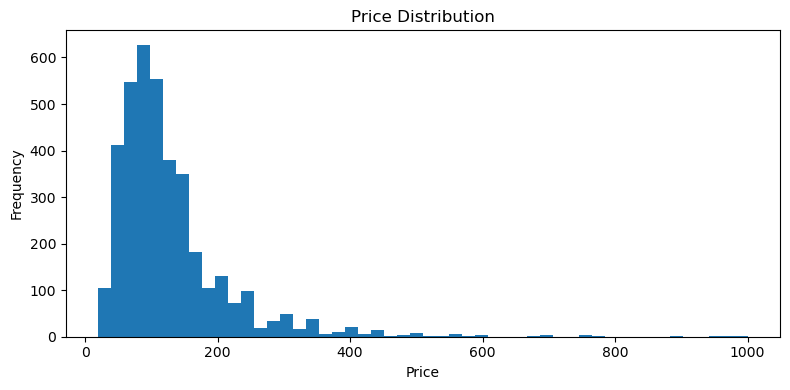

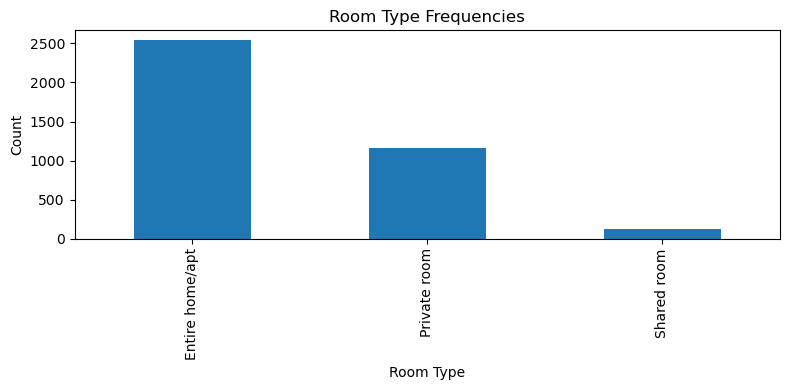

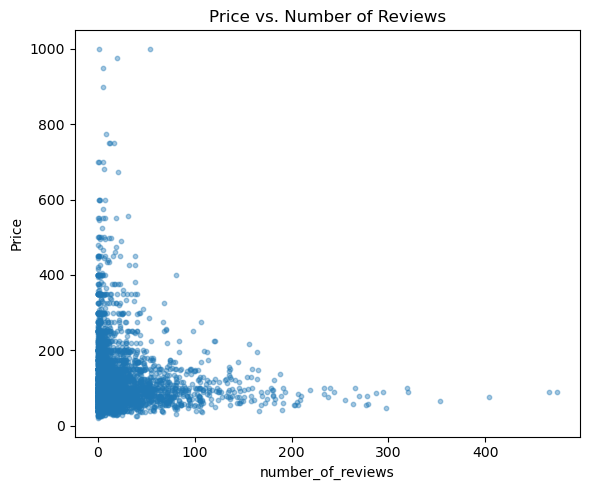

In [3]:

# Utilities
def clean_price_series(s):
    # Handles price fields like "$1,234.00" → 1234.0
    return (
        s.astype(str)
         .str.replace(r'[^0-9\.-]', '', regex=True)
         .replace('', np.nan)
         .astype(float)
    )

# Identify a plausible price column; common names in Airbnb data are 'price' or 'price_x'
price_col = None
for c in df.columns:
    if c.lower().strip() == 'price':
        price_col = c
        break
if price_col is None:
    # fallback: look for any column containing 'price'
    for c in df.columns:
        if 'price' in c.lower():
            price_col = c
            break

if price_col is None:
    raise ValueError("No price-like column found. Please check your CSV and set price_col manually.")

df['_price_clean'] = clean_price_series(df[price_col])

# Room type column heuristic
room_col = None
for c in df.columns:
    if c.lower().strip() == 'room_type':
        room_col = c
        break
if room_col is None:
    for c in df.columns:
        if 'room' in c.lower() and 'type' in c.lower():
            room_col = c
            break

# Number of reviews column heuristic
reviews_col = None
candidates = ['number_of_reviews', 'reviews', 'review_count']
for cand in candidates:
    if cand in df.columns:
        reviews_col = cand
        break
if reviews_col is None:
    # fallback: try to guess by name signal
    for c in df.columns:
        if 'review' in c.lower() and ('number' in c.lower() or 'count' in c.lower()):
            reviews_col = c
            break
# If still None, try 'reviews_per_month' as proxy (scaled)
if reviews_col is None and 'reviews_per_month' in df.columns:
    reviews_col = 'reviews_per_month'

print("Detected columns → price:", price_col, "| room_type:", room_col, "| reviews:", reviews_col)

# --- Hist: price distribution ---
plt.figure(figsize=(8,4))
df['_price_clean'].dropna().plot(kind='hist', bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Bar: room type frequencies ---
if room_col is not None:
    plt.figure(figsize=(8,4))
    df[room_col].value_counts().plot(kind='bar')
    plt.title('Room Type Frequencies')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Room type column not found; skipping bar chart.")

# --- Scatter: price vs number_of_reviews ---
if reviews_col is not None:
    plt.figure(figsize=(6,5))
    sample = df[[reviews_col, '_price_clean']].dropna()
    # avoid overplotting
    if len(sample) > 10000:
        sample = sample.sample(10000, random_state=42)
    plt.scatter(sample[reviews_col], sample['_price_clean'], s=10, alpha=0.4)
    plt.title('Price vs. Number of Reviews')
    plt.xlabel(reviews_col)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()
else:
    print("Reviews column not found; skipping scatter.")


## 5) Preprocessing — Clean, Encode, Scale, Split

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Target
y = df['_price_clean']

# Feature selection: include reasonable numeric & categorical predictors when present
num_candidates = [
    'accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights',
    'number_of_reviews','review_scores_rating','review_scores_cleanliness',
    'review_scores_checkin','review_scores_communication','review_scores_location',
    'review_scores_value','reviews_per_month','host_listings_count','availability_365'
]
cat_candidates = [
    'room_type','property_type','bed_type','neighbourhood_cleansed','cancellation_policy',
    'city'
]

num_cols = [c for c in num_candidates if c in df.columns]
cat_cols = [c for c in cat_candidates if c in df.columns]
print('Using numeric cols:', num_cols)
print('Using categorical cols:', cat_cols)

X = df[num_cols + cat_cols].copy()

# Simple missing handling:
# - numeric: fill with median
# - categorical: fill with most frequent
for c in num_cols:
    X[c] = pd.to_numeric(X[c], errors='coerce')
    X[c] = X[c].fillna(X[c].median())

for c in cat_cols:
    X[c] = X[c].astype('category')
    X[c] = X[c].cat.add_categories(['__missing__']).fillna('__missing__')

# Drop rows where price (target) is missing or non-positive
mask = y.notna() & (y > 0)
X = X.loc[mask]
y = y.loc[mask]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ],
    remainder='drop'
)

# Fit-transform
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.shape, X_test_prep.shape


Using numeric cols: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'host_listings_count', 'availability_365']
Using categorical cols: ['room_type', 'property_type', 'bed_type', 'neighbourhood_cleansed', 'cancellation_policy', 'city']


((3054, 136), (764, 136))

## 6) Models — Linear Regression, SVR, Decision Tree Regressor

In [5]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = {
    'linreg': LinearRegression(),
    'svr': SVR(kernel='rbf'),
    'dtree': DecisionTreeRegressor(random_state=42)
}
list(models.keys())


['linreg', 'svr', 'dtree']

## 7) Hyperparameter Tuning (GridSearchCV)

In [6]:

from sklearn.model_selection import GridSearchCV, KFold

param_grids = {
    'linreg': {  # no major hparams; use as baseline (grid with none)
        # empty grid triggers a single fit
    },
    'svr': {
        'C': [1.0, 10.0, 50.0],
        'gamma': ['scale', 0.1, 0.01],
        'epsilon': [0.1, 0.2]
    },
    'dtree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 2, 5]
    }
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

best_estimators = {}
tuned_results = {}

for name, model in models.items():
    print(f"\n>>> Tuning {name} ...")
    grid = param_grids.get(name, {})
    if len(grid) == 0:
        # Fit once without CV grid
        model.fit(X_train_prep, y_train)
        best_estimators[name] = model
        tuned_results[name] = {'best_params_': {}, 'best_score_': None}
        print("No hyperparameters to tune; fitted baseline.")
    else:
        gs = GridSearchCV(
            model, grid, scoring='neg_root_mean_squared_error',
            cv=cv, n_jobs=-1, verbose=1
        )
        gs.fit(X_train_prep, y_train)
        best_estimators[name] = gs.best_estimator_
        tuned_results[name] = {'best_params_': gs.best_params_, 'best_score_': gs.best_score_}
        print("Best params:", gs.best_params_)
        print("Best CV (neg RMSE):", gs.best_score_)



>>> Tuning linreg ...
No hyperparameters to tune; fitted baseline.

>>> Tuning svr ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'C': 50.0, 'epsilon': 0.1, 'gamma': 0.01}
Best CV (neg RMSE): -60.59009740155711

>>> Tuning dtree ...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best params: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV (neg RMSE): -66.75857227311809


## 8) Training Evaluation — MAE, MSE, RMSE

In [7]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

def eval_regression(model, X, y, title=""):
    pred = model.predict(X)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = math.sqrt(mse)
    print(f"{title} -> MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f}")
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'y_pred': pred}

train_eval = {}
for name, est in best_estimators.items():
    train_eval[name] = eval_regression(est, X_train_prep, y_train, title=f"{name} (Train)")
train_eval


linreg (Train) -> MAE: 34.9465 | MSE: 3257.6681 | RMSE: 57.0760
svr (Train) -> MAE: 31.0035 | MSE: 3398.3476 | RMSE: 58.2953
dtree (Train) -> MAE: 29.8009 | MSE: 2499.9438 | RMSE: 49.9994


{'linreg': {'MAE': 34.94650458415193,
  'MSE': 3257.6681043303865,
  'RMSE': 57.075985355755236,
  'y_pred': array([ 37.625,  46.   ,  80.75 , ...,  81.125, 123.   ,  78.75 ])},
 'svr': {'MAE': 31.003541133843466,
  'MSE': 3398.3475652454786,
  'RMSE': 58.29534771528066,
  'y_pred': array([ 65.02422502,  50.92142754,  72.25905377, ...,  78.07493842,
         121.52126472,  91.18848302])},
 'dtree': {'MAE': 29.800897131524128,
  'MSE': 2499.9437757099954,
  'RMSE': 49.99943775393875,
  'y_pred': array([ 48.52941176,  62.73148148,  68.19534884, ...,  73.91836735,
         109.49287749, 106.45714286])}}

## 9) Test Evaluation + Bootstrapped 95% Confidence Intervals

In [8]:

from tqdm import tqdm
import numpy as np

test_eval = {}
boot_summary = {}

def bootstrap_errors(y_true, y_pred, n_boot=300, random_state=42):
    rng = np.random.default_rng(random_state)
    N = len(y_true)
    maes, mses, rmses = [], [], []
    for _ in tqdm(range(n_boot), desc='Bootstrapping'):
        idx = rng.integers(0, N, size=N)
        yt = y_true[idx]
        yp = y_pred[idx]
        mae = np.mean(np.abs(yt - yp))
        mse = np.mean((yt - yp)**2)
        rmse = np.sqrt(mse)
        maes.append(mae); mses.append(mse); rmses.append(rmse)
    def ci(a):
        lo, hi = np.percentile(a, [2.5, 97.5])
        return float(np.mean(a)), float(lo), float(hi)
    return {
        'MAE_mean_CI': ci(maes),
        'MSE_mean_CI': ci(mses),
        'RMSE_mean_CI': ci(rmses),
    }

for name, est in best_estimators.items():
    te = eval_regression(est, X_test_prep, y_test, title=f"{name} (Test)")
    test_eval[name] = te
    # bootstrap on test
    y_pred_test = te['y_pred']
    boot_summary[name] = bootstrap_errors(y_test.to_numpy(), y_pred_test)

print("\n=== Bootstrapped 95% CIs (mean, 2.5%, 97.5%) ===")
for name, summ in boot_summary.items():
    print(f"\n{name}:")
    for k, v in summ.items():
        mean, lo, hi = v
        print(f"  {k}: mean={mean:.4f}, 95% CI=({lo:.4f}, {hi:.4f})")


linreg (Test) -> MAE: 58395283293.3056 | MSE: 824276078314563148185600.0000 | RMSE: 907896512998.3500


Bootstrapping: 100%|██████████| 300/300 [00:00<00:00, 11957.65it/s]


svr (Test) -> MAE: 31.3219 | MSE: 3149.3172 | RMSE: 56.1188


Bootstrapping: 100%|██████████| 300/300 [00:00<00:00, 9519.10it/s]


dtree (Test) -> MAE: 37.1169 | MSE: 3609.1376 | RMSE: 60.0761


Bootstrapping: 100%|██████████| 300/300 [00:00<00:00, 10635.99it/s]


=== Bootstrapped 95% CIs (mean, 2.5%, 97.5%) ===

linreg:
  MAE_mean_CI: mean=60035181751.7082, 95% CI=(7075638115.7347, 131836932017.6312)
  MSE_mean_CI: mean=850094473771776754057216.0000, 95% CI=(38249395845134056161280.0000, 1984191404096021160001536.0000)
  RMSE_mean_CI: mean=861482793293.8456, 95% CI=(195574527597.8803, 1408613291182.5095)

svr:
  MAE_mean_CI: mean=31.3469, 95% CI=(28.0996, 35.1069)
  MSE_mean_CI: mean=3164.0073, 95% CI=(2239.8607, 4487.4653)
  RMSE_mean_CI: mean=56.0231, 95% CI=(47.3271, 66.9885)

dtree:
  MAE_mean_CI: mean=37.1475, 95% CI=(33.9090, 40.9986)
  MSE_mean_CI: mean=3642.6753, 95% CI=(2714.9856, 4967.9703)
  RMSE_mean_CI: mean=60.1665, 95% CI=(52.1052, 70.4838)


## 10) Model Comparison & Over/Underfitting Check

In [9]:

import pandas as pd

rows = []
for name in best_estimators.keys():
    rows.append({
        'model': name,
        'train_RMSE': train_eval[name]['RMSE'],
        'test_RMSE': test_eval[name]['RMSE'],
        'train_MAE': train_eval[name]['MAE'],
        'test_MAE': test_eval[name]['MAE'],
    })
cmp_df = pd.DataFrame(rows).sort_values('test_RMSE')
display(cmp_df)

print("\nNotes:")
for _, r in cmp_df.iterrows():
    gap = r['test_RMSE'] - r['train_RMSE']
    note = "balanced fit"
    if gap > 20:  # heuristic; adjust depending on price scale
        note = "possible overfitting (train much lower error than test)"
    elif r['test_RMSE'] > r['train_RMSE'] * 1.25:
        note = "likely overfitting (relative gap)"
    elif r['test_RMSE'] < r['train_RMSE'] * 0.9:
        note = "possible underfitting (test unexpectedly lower than train)"
    print(f"- {r['model']}: ΔRMSE={gap:.2f} → {note}")


,model,train_RMSE,test_RMSE,train_MAE,test_MAE
1,svr,58.295348,5.611878e+01,31.003541,3.132188e+01
2,dtree,49.999438,6.007610e+01,29.800897,3.711688e+01
0,linreg,57.075985,9.078965e+11,34.946505,5.839528e+10



Notes:
- svr: ΔRMSE=-2.18 → balanced fit
- dtree: ΔRMSE=10.08 → balanced fit
- linreg: ΔRMSE=907896512941.27 → possible overfitting (train much lower error than test)
